# Procesamiento y EDA de base de datos de CENGAGE

- Análisis de Ciencias de Datos
- TC2004B.100
- Profesores:
  - Rubí Isela Gutiérrez López
  - Daniel Otero Fadul
- Equipo 4

| Nombre | Matrícula |
| ---- | ---- |
| Juan Pablo Echeagaray González | A00830646 |
| Emily Rebeca Méndez Cruz | A00830768 |
| Eugenio Santisteban Zolezzi | A01720932 |
| Taurino López González | A01284076 |
| Ricardo de Jesús Balam Ek | A00831262 |
| Grace Aviance Silva Aróstegui | A01285158 |

Fecha: 11 de marzo del 2022


Durante esta etapa del proyecto se hará una limpieza, procesamiento y análisis exploratorio de la base de datos proporcionada por el socio formador, CENGAGE. En este cuaderno se encuentran diferentes tareas de limpieza de datos, y algunas visualizaciones que facilitan la comprensión de las tendencias que hay en la base de datos.

Algunas de las tareas realizadas fueron:
- Limpieza de datos general
- Manipulación de variables de texto
- Análisis de ventas y operaciones por consultor
- Series de tiempo de las ganancias
- Agregación y visualización de ganancias, número de unidades vendidas

## Metas de investigación

- Predecir el comportamiento de las ventas en un mundo post-pandémico
- Analizar y visualizar tendencias de las ganancias

## Dependencias

In [2]:
from IPython.core.display import HTML
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Arregla el formato del texto de salida del IDE
# No afecta a la visualización del cuaderno cuando se exporta a HTML
HTML(r"""
<style>
    .output-plaintext, .output-stream, .output {
        font-family: Cascadia Code; # Any monospaced font should work
        line-height: 1.3 !important;
        font-size: 14px !important;
    }
</style>
""")


## Lectura de datos

In [3]:
df = pd.read_csv('datos-reto.csv')
# La primera columna es un índice, no se necesita mantener
df.drop(df.columns[[0]], axis=1, inplace=True)


## Preprocesamiento de datos

In [4]:
df.head()


,Country,Consultant,Opportunity ID,Account,ISBN 13,Author,Title,Probability,% de Avance,Term,...,Adjusted Revenue,Technology,Course Name,Edition,Course ID,# of Courses,Customer,Client,Unlimited Flag,Implementation Id
0,Mexico,14,5255970,COLEGIO DE BACHILLERES DE CHIHUAHUA,9.786080e+12,Martinez,Literatura II,No_Aceptada,0,Aug-21,...,0,NaN,LITERATURA COBACH,1.0,1847125,NaN,Potential Customer,3705,NaN,NaN
1,Mexico,10,5172372,U-ERRE UNIVERSIDAD REGIOMONTANA,9.781340e+12,Serway/Vuille,INTL IAC WA FUNDAMENTOS DE FIS ICA,Closed Sale,1,Jan-21,...,0,WebAssign,FISICA 1 PREPA U-ERRE,11.0,1905363,NaN,Potential Customer,3681,NaN,NaN
2,Mexico,6,4496314,ITESM CAMPUS MONTERREY,9.786080e+12,CENGAGE,BIBLIOTECA DIGITAL MAGELLAN,No_Aceptada,0,Sep-20,...,0,NaN,BIBLIOTECA DIGITAL,1.0,1873177,NaN,Potential Customer,5929,NaN,NaN
3,Mexico,0,5745690,UNITEC CAMPUS CUITLAHUAC,9.786080e+12,GALINDO,MODELOS DE ORGANIZACIÓN,Evaluation Visit,0.75,May-22,...,0,NaN,Estructuras organizacionales y gestión del con...,1.0,1934416,NaN,Potential Customer,2538,NaN,NaN
4,Mexico,0,5745686,UNITEC CAMPUS CUITLAHUAC,9.786080e+12,GALINDO,MODELOS DE ORGANIZACIÓN,Evaluation Visit,0.75,Jan-22,...,0,NaN,Estructuras organizacionales y gestión del con...,1.0,1934416,NaN,Potential Customer,2538,NaN,NaN


In [5]:
df.columns


Index(['Country', 'Consultant', 'Opportunity ID', 'Account', 'ISBN 13',
       'Author', 'Title', 'Probability', '% de Avance ', 'Term',
       'New Course Takeaway Units', 'Seats', 'Units', 'Revenue',
       'Adjusted Revenue', 'Technology', 'Course Name', 'Edition', 'Course ID',
       '# of Courses', 'Customer', 'Client', 'Unlimited Flag',
       'Implementation Id'],
      dtype='object')

In [6]:
# Remover espacios blancos de las columnas
df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df.columns = df.columns.str.strip()


In [7]:
df.dtypes


Country                       object
Consultant                     int64
Opportunity ID                 int64
Account                       object
ISBN 13                      float64
Author                        object
Title                         object
Probability                   object
% de Avance                   object
Term                          object
New Course Takeaway Units    float64
Seats                          int64
Units                          int64
Revenue                      float64
Adjusted Revenue               int64
Technology                    object
Course Name                   object
Edition                      float64
Course ID                      int64
# of Courses                 float64
Customer                      object
Client                         int64
Unlimited Flag               float64
Implementation Id            float64
dtype: object

Ya que sabemos los tipos de cada una de las columnas podremos hacer las modificaciones pertinentes; como lo sería el caso de ajustar el tipo de una columna numérica que esté representada como una cadena de texto a su tipo real.

In [8]:
df['Term'].unique()


array(['Aug-21', 'Jan-21', 'Sep-20', 'May-22', 'Jan-22', 'Nov-20',
       'Aug-20', 'Aug-22', 'Mar-22', 'Sep-22', 'Dec-20', 'Feb-21',
       'Feb-22', 'Dec-21', 'Mar-21', 'Sep-21', 'Nov-22', 'Dec-22',
       'Nov-21', 'Jul-20', 'Apr-21', 'Jul-22', 'May-21', 'Jul-21',
       'Jun-22', 'Oct-20', 'Apr-22', 'Jun-20', 'Jun-21', 'Oct-21',
       'Oct-22'], dtype=object)

El que la base de datos venga con una columna que registre un periodo en específico ayudará a hacer análisis a través del tiempo. Las gráficas de series de tiempo pueden ser una herramienta útil para entender el comportamiento de algunas variables; aunado a esto, una vez que podamos hacer series de tiempo, la realización de pronósticos se vuelve mucho más sencilla.


In [9]:
prop_tech = df.Technology.value_counts().sum() / df.shape[0]
print(f'Proporción de tecnologías: {prop_tech:.2%}')


Proporción de tecnologías: 12.49%


La variable de `Technology` indica si es que hay una herramienta tecnológica asociada a esa operación en particular. De este caso vemos que solamente el %12.49 de las ventas de CENGAGE tienen una herramienta tecnológica asociada.


In [10]:
df['% de Avance'].value_counts()


Base Confirmada        5976
1                      5426
0.5                    4548
0                      3265
0.25                   2097
Base por Confirmar     1958
0.75                   1194
0.1                      35
Name: % de Avance, dtype: int64

La variable de `% de Avance` codifica una _pseudo probabilidad_ de que se concrete una operación, en ella se quiere informar del estado del proceso de venta en el que una operación se encuentre.


### Procesamiento de la variable `Technology`

In [11]:
df['Technology'].fillna('Copia física', inplace=True)


La columna `Technology` contenía originalmente una gran cantidad de campos vacíos; después de una reunión con el socio formador supimos que estos campos vacíos hacen alusión a libros tradicionales.

### Remover columnas con valores NaN

Hay que investigar primero de qué están compuestas estas columnas. Si encontramos algunas con una proporción de valores nulos mayor a cierta tolerancia, no deberíamos de usarlas para la creación de un modelo predictivo

In [12]:
# Completamente arbitrario (yo pensaría que >50% sería mejor)
tresh = 0.7
nan_props = []
for col in df.columns:
    nan_props.append(df[col].isnull().sum() / len(df))


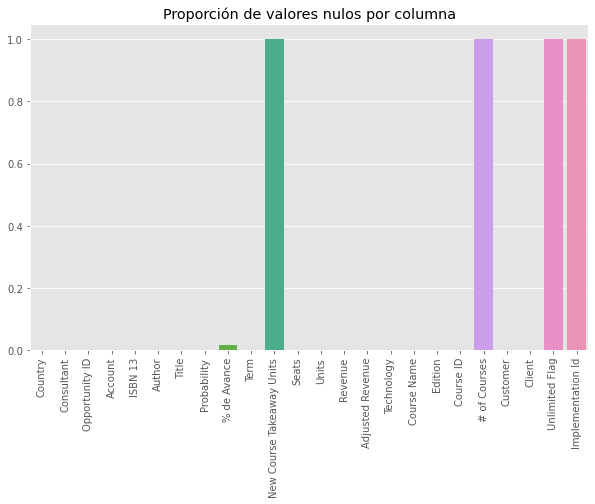

In [13]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df.columns, y=nan_props)
ax.set_title('Proporción de valores nulos por columna')
ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


4 de las 24 columnas de la base de datos están compuestas completamente de valores nulos.

In [14]:
# Remover todas las columnas con un porcentaje de nulos mayor al treshold
old_cols = df.columns
df.dropna(axis=1, thresh=tresh * df.shape[0], inplace=True)
new_cols = df.columns


In [15]:
old_cols.difference(new_cols)


Index(['# of Courses', 'Implementation Id', 'New Course Takeaway Units',
       'Unlimited Flag'],
      dtype='object')

Al finalizar este paso de limpieza hemos removido las columnas antes mencionadas debido a que estas estaban compuestas completamente de valores nulos.

> Después de una reunión con el socio formador supimos que la información de estas columnas no fue guardada de forma correcta al hacernos llegar este documento. El mismo socio formador nos indicó que la información de estas columnas no es relevante para nuestro caso de estudio, así que no hay ningún inconveniente con eliminarlas

### Conversión de `term` a formato `datetime`

Esta conversión facilitará la agregación y visualización de los datos cuando entremos a la fase del análisis exploratorio de datos.

In [16]:
# Convertir a formato datetime la columna 'term'
df['Term'] = pd.to_datetime(df['Term'], format='%b-%y')


### Manipulación de variables con texto

In [17]:
df['Title'] = df['Title'].str.lower().str.strip()
df['Author'] = df['Author'].str.lower().str.strip()
df['Account'] = df['Account'].str.lower().str.strip()
df['Course Name'] = df['Course Name'].str.lower().str.strip()


Primera aproximación al procesamiento del texto en la base de datos. Con este paso solo hemos convertido todos los caracteres a minúsculas, así también eliminamos los espacios en blanco al principio y al final de cada cadena de texto. Un proceso de `stemming` y `lemmatization` podría ser útil para el entrenamiento de un modelo predictivo; tomando esto en cuenta la realización de esta tarea quedará como una posibilidad.


### Procesamiento del `Revenue`

Dada nuestra meta de investigación debemos de asegurarnos de que la columna del `Revenue` tenga valores correctos, el determinar si la información es correcta requiere de un amplio conocimiento del negocio, pero hay algunas acciones que podemos realizar como equipo en base a las reuniones sostenidas con el socio formador.

Una primera aproximación será corroborar que el revenue registrado coincida con las posibles categorías de la columna `Probability`, en esta columna está codificada una _pseudo-probabilidad_ de que la operación sea exitosa; como un equipo externo no podemos verificar que todas las entradas sean correctas, pero con lo que sí disponemos es asegurarnos de que las columnas con el campo `No_Aceptada` tengan un revenue asociado de 0, ya que el socio formador dejó en claro que cuando se da el caso de que la probabilidad tenga ese campo, esa oportunidad de negocio fue una pérdida.

Otra vertiente a considerar es que estos valores de `Revenue` no deberían de ser modificados, pues el valor presente representa la ganancia que CENGAGE estimó que recibiría de la operación. El cuál de estas 2 opciones es la mejor será algo que podremos verificar una vez que comencemos a entrenar modelos de machine learning, pero de momento hemos escogido no alterar estos valores.

In [18]:
df['Revenue'].describe()


count    2.486200e+04
mean     8.626979e+03
std      2.623013e+04
min      0.000000e+00
25%      1.634160e+03
50%      3.300000e+03
75%      7.365600e+03
max      1.308277e+06
Name: Revenue, dtype: float64

La distribución de esta variable sigue un comportamiento bastante atípico, puesto que observamos que al menos el 75% de los datos se encuentran en un rango de valores desde 0 a \$7,365, pero luego de eso vemos que hay una entrada con un valor de $1,308,000 aproximadamente. Tomando esto en cuenta, 3 ordenes de magnitud no es algo que podamos dejar pasar por alto.

In [19]:
df['Log revenue'] = np.log(df['Revenue'], where = (df['Revenue']>0))


In [20]:
df['Log revenue'].describe()

count    24862.000000
mean         8.132759
std          1.401861
min          0.000000
25%          7.398884
50%          8.101678
75%          8.904576
max         14.084222
Name: Log revenue, dtype: float64

In [21]:
# Investigar el caso del revenue máximo
df[df['Revenue'] == df['Revenue'].max()]


,Country,Consultant,Opportunity ID,Account,ISBN 13,Author,Title,Probability,% de Avance,Term,...,Units,Revenue,Adjusted Revenue,Technology,Course Name,Edition,Course ID,Customer,Client,Log revenue
0,Mexico,14,5255970,colegio de bachilleres de chihuahua,9.786080e+12,martinez,literatura ii,No_Aceptada,0,2021-08-01,...,8929,1308277.08,0,Copia física,literatura cobach,1.0,1847125,Potential Customer,3705,14.084222


Podemos observar que para el caso de la operación con el valor máximo de revenue, la categoría de `Probability` tiene un valor de `No_Aceptada`, esto nos indica que existe la posibilidad de que varias entradas de la base de datos tengan un `Revenue` asociado que no haya sido actualizado. El procesamiento de estos casos es una tarea que reanudaremos cuando comencemos a entrenar modelos predictivos.

### Procesamiento del `% de Avance`

El `% de Avance` es una variable que depende directamente de la columna `Probability`, por lo que hay que asegurarse de que los valores de la primera estén acorde a lo que implica determinada probabilidad.

In [22]:
# Hacer que cuando la base sea perdida o no aceptada, el % de Avance sea 0
df.loc[df['Probability'] == 'No_Aceptada', '% de Avance'] = 0
df.loc[df['Probability'] == 'Base_Perdida', '% de Avance'] = 0

# Codificar la base confirmada como con una probabilidad de 1
df['% de Avance'] = df['% de Avance'].str.strip()
df.loc[df['% de Avance'] == 'Base Confirmada', '% de Avance'] = '1'
# Modificaremos la Base por Confirmar a un 30%
df.loc[df['% de Avance'] == 'Base por Confirmar', '% de Avance'] = '0.3'


In [23]:
df['% de Avance'] = pd.to_numeric(
    df['% de Avance'], downcast='float', errors='coerce')


### Investigando el `Adjusted Revenue`

In [24]:
df['Adjusted Revenue'].describe()


count    24862.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Adjusted Revenue, dtype: float64

Debido a que esta columna está llena de valores nulos, no podemos utilizarla para generar un modelo predictivo o de clasificación. Considerando esto tendremos que dejarla de lado para nuestro modelo.

In [25]:
df.drop(['Adjusted Revenue'], axis=1, inplace=True)


### Tratamiento de la variable `Probability`

In [26]:
df.Probability.value_counts()


Closed Sale            5366
Muestra                4548
Base_Vendida           3877
No_Aceptada            2165
Base_Confirmada        2099
Interview              2097
Base_Por_Confirmar     1958
Evaluation Visit       1194
Identified Prospect    1100
Base_Perdida            363
Vendida                  60
Custom Adoption          29
At Risk                   6
Name: Probability, dtype: int64

#### Posible mapeo

En la variable `% de Avance` hay que considerar que:

- Base confirmada $\rightarrow$ Socios conocidos de antes, es como algo recurrente
- 100% $\rightarrow$ cuando hay un proceso de venta, es para clientes nuevos

Posible ordenamiento de las categorías de `Probability` hay varias que tienen el mismo _peso_:

1. Base confirmada, Closed Sale, Base_Vendida, Vendida $\rightarrow$ 100
2. Evaluation Visit $\rightarrow$ 75
3. Muestra, Base por Confirmar $\rightarrow$ 50
4. Interview $\rightarrow$ 25
5. At risk, Custom Adoption $\rightarrow$ 10
6. No_Aceptada, Base_Perdida, Identified Prospect $\rightarrow$ 0

#### Conservando como texto

In [27]:
ordered_probs = ['No_Aceptada', 'Base_Perdida', 'Identified Prospect', 'At risk',
                 'Custom Adoption', 'Interview', 'Muestra', 'Base por Confirmar',
                 'Evaluation Visit', 'Vendida', 'Base_Vendida', 'Closed Sale',
                 'Base Confirmada']
prob_type = pd.CategoricalDtype(categories=ordered_probs, ordered=True)
df.Probability.astype(prob_type)


0                No_Aceptada
1                Closed Sale
2                No_Aceptada
3           Evaluation Visit
4           Evaluation Visit
                ...         
24857    Identified Prospect
24858    Identified Prospect
24859    Identified Prospect
24860           Base_Vendida
24861       Evaluation Visit
Name: Probability, Length: 24862, dtype: category
Categories (13, object): ['No_Aceptada' < 'Base_Perdida' < 'Identified Prospect' < 'At risk' ... 'Vendida' < 'Base_Vendida' < 'Closed Sale' < 'Base Confirmada']

#### Codificando a un número

In [28]:
coded_probs = {'No_Aceptada': 0, 'Base_Perdida': 0, 'Identified Prospect': 0, 'At risk': 0,
               'Custom Adoption': 0.1, 'Interview': 0.25, 'Muestra': 0.5, 'Base por Confirmar': 0.5,
               'Evaluation Visit': 0.75, 'Vendida': 1, 'Base_Vendida': 1, 'Closed Sale': 1,
               'Base Confirmada': 1}
df['Coded Probability'] = df['Probability'].map(coded_probs)


## Análisis exploratorio de datos

### Matriz de correlaciones

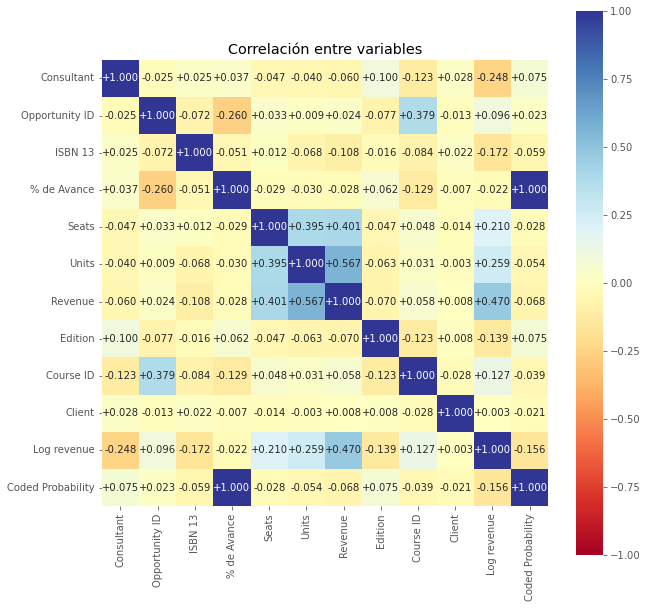

In [29]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='RdYlBu',
            annot=True, square=True,
            vmin=-1, vmax=1, fmt='+.3f')
plt.title('Correlación entre variables');


Como se puede percibir, las dos variables que poseen más correlación entre ellas son la variable `Revenue` y la variable `Units`; esta información es algo que esperaríamos encontrar, ya que el socio formador nos indicó que la variable `Revenue` es calculada como el producto de `Units` por el precio del producto que vayan a vender.


### Revenue por unidad

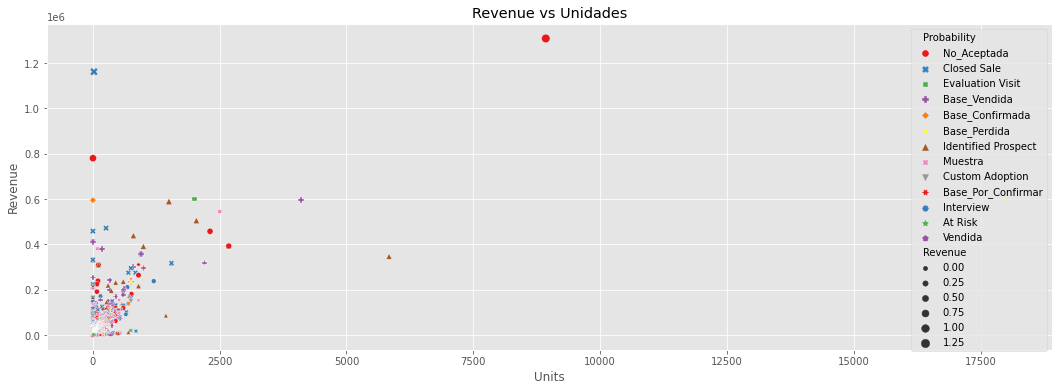

In [30]:
plt.figure(figsize=(18, 6))
ax = sns.scatterplot(x='Units', y='Revenue', data=df, hue='Probability',
                     style='Probability', size='Revenue', palette='Set1')
ax.set_title('Revenue vs Unidades');


De manera general, analizando esta gráfica podemos percatarnos de que la gran mayoría de los operaciones que se encuentran en la base de datos involucran un rango de unidades menores a 3,000 y en ingresos estos tienen un impacto razonable mostrando valores tan altos como $600,000. Sin embargo, hay algunos valores que se encuentran bastante alejados de la mayoría, con una cantidad de 17,500 unidades o con ingresos considerablemente más altos. Se requiere un análisis más detallado de qué es lo que sucede en cada una de estas operaciones.

### Investigando a los consultores

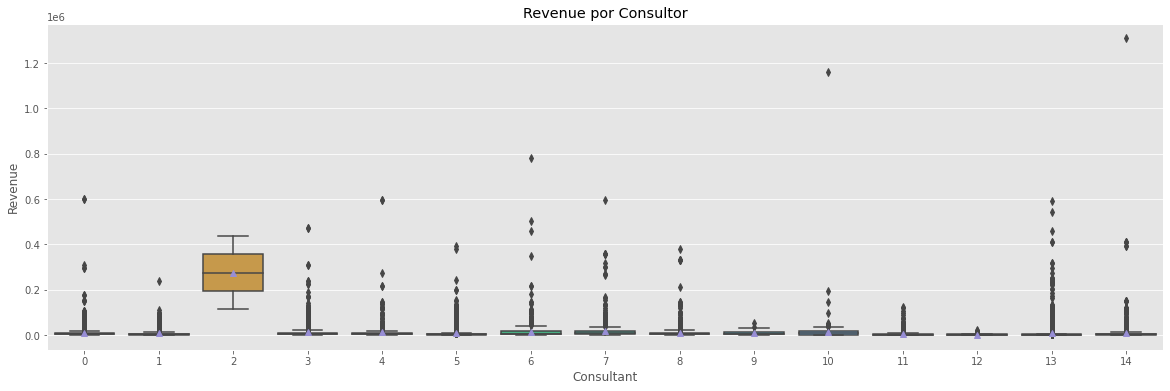

In [31]:
plt.figure(figsize=(20, 6))
ax = sns.boxplot(x='Consultant', y='Revenue', data=df, showmeans=True)
ax.set_title('Revenue por Consultor');


Dada la distribución tan extrema del revenue por cada consultor, conviene discretizar estos valores en diferentes categorías que encapsulen el nivel del revenue, un ejemplo bastante ordinario sería `bajo`, `medio`, `alto`.

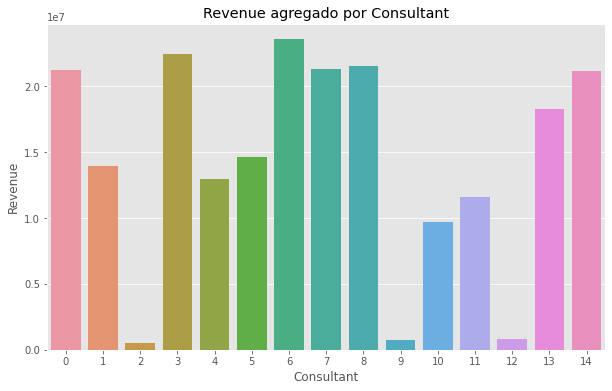

In [32]:
plt.figure(figsize=(10, 6))
agg_revenue = df.groupby('Consultant').sum()['Revenue']
ax = sns.barplot(x=agg_revenue.index, y=agg_revenue)
ax.set_title('Revenue agregado por Consultant');


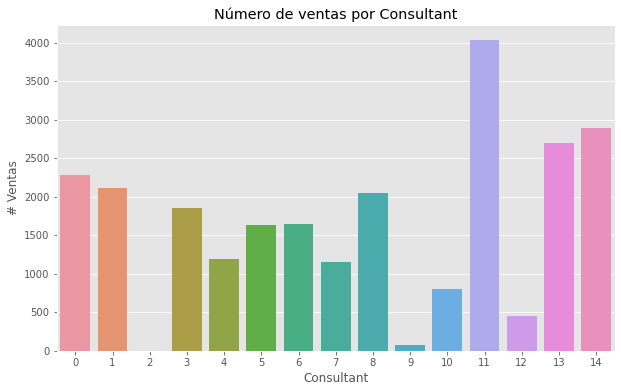

In [33]:
# Número de operaciones por consultant
plt.figure(figsize=(10, 6))
agg_ops = df['Consultant'].value_counts().sort_index()
ax = sns.barplot(x=agg_ops.index, y=agg_ops)
ax.set_title('Número de ventas por Consultant')
ax.set_ylabel('# Ventas')
ax.set_xlabel('Consultant');


Será interesante ahora visualizar la _efectividad_ de cada consultor, es decir, la proporción del revenue agregado que generan y el número de operaciones realizadas en total.

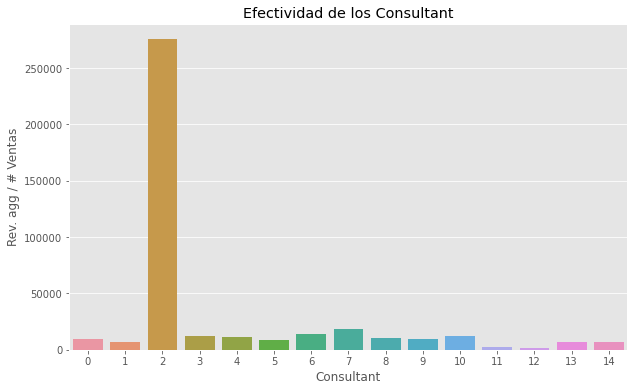

In [34]:
# Efectividad de los consultant? Revenue agregado / # operaciones
plt.figure(figsize=(10, 6))
effectiveness = agg_revenue / agg_ops
ax = sns.barplot(x=agg_ops.index, y=effectiveness)
ax.set_title('Efectividad de los Consultant')
ax.set_ylabel('Rev. agg / # Ventas')
ax.set_xlabel('Consultant');


Gracias a esto podemos decir que el caso del consultor 2 tal vez debería de ser analizado con más cuidado, ya que ha tenido ventas con un revenue no tan grande, pero solo ha tenido 2 ventas durante todo el periodo de registro de la base de datos.

In [35]:
consultant = 2
df.Consultant.value_counts().sort_index()[consultant]


2

### Comportamiento del `Revenue` a través del tiempo

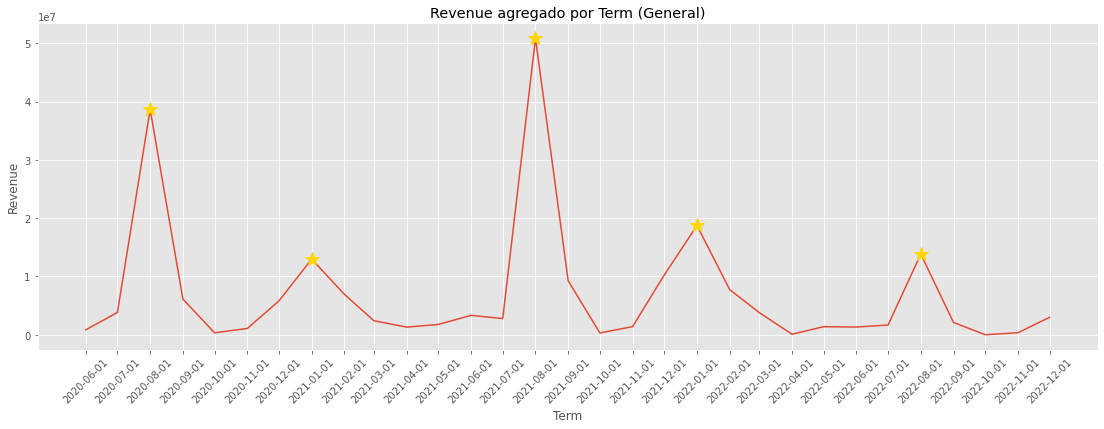

In [36]:
from scipy.signal import find_peaks

plt.figure(figsize=(19, 6))
agg_revenue_term = df.groupby('Term').sum()['Revenue']
ax = sns.lineplot(x=agg_revenue_term.index, y=agg_revenue_term)
plt.xticks(agg_revenue_term.index, rotation=45)

# Encontrar los máximos locales
peaks, _ = find_peaks(agg_revenue_term, distance=5)
# Plot the peaks
plt.plot(agg_revenue_term.index[peaks],
         agg_revenue_term[peaks], "*", markersize=15, color='gold')
ax.set_title('Revenue agregado por Term (General)');


Con esta gráfica identificamos claramente que los picos de este corresponden a los periodos de inicio de cada semestre. Lo primero que salta a la vista, es que el patrón observado en los primeros 4 máximos no se repite con la última observación; de acuerdo al socio formador deberíamos de notar una caída constante en las ventas, por lo que el que este pico no se haya repetido podría ser una confirmación de lo que nos comentó.


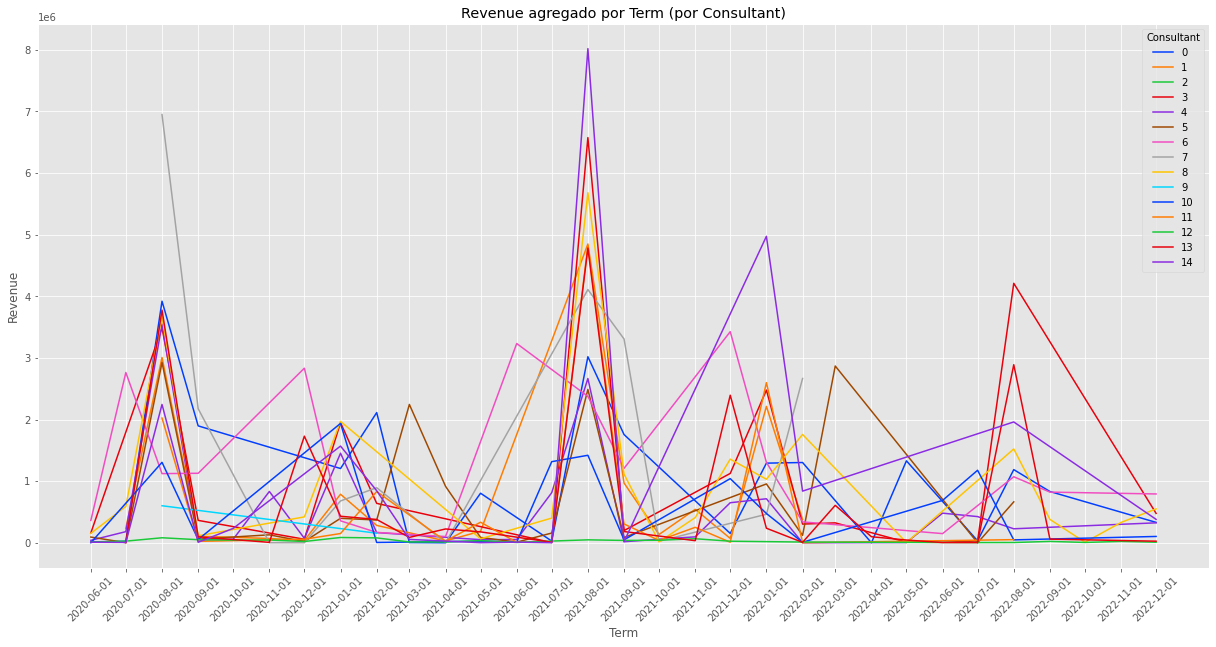

In [37]:
plt.figure(figsize=(21, 10))
ax = sns.lineplot(x='Term', y='Revenue', hue='Consultant', data=df,
                  legend='full', ci=None, palette='bright', estimator=np.sum)
plt.xticks(agg_revenue_term.index, rotation=45)
ax.set_title('Revenue agregado por Term (por Consultant)');


Aunque esta gráfica parezca algo comprimida, podemos ver claramente dónde se encuentran los picos de venta que habíamos avistado y comentado en la gráfica anterior. Aunado a esto, vemos que en el último periodo no hay muchos consultores que hayan registrado ventas, de alguna manera deberíamos de tener en cuenta este hecho para cualquier método de predicción (o clasificación) que vayamos a implementar.

### Libros más vendidos

#### Libros con más revenue

In [38]:
top = 15


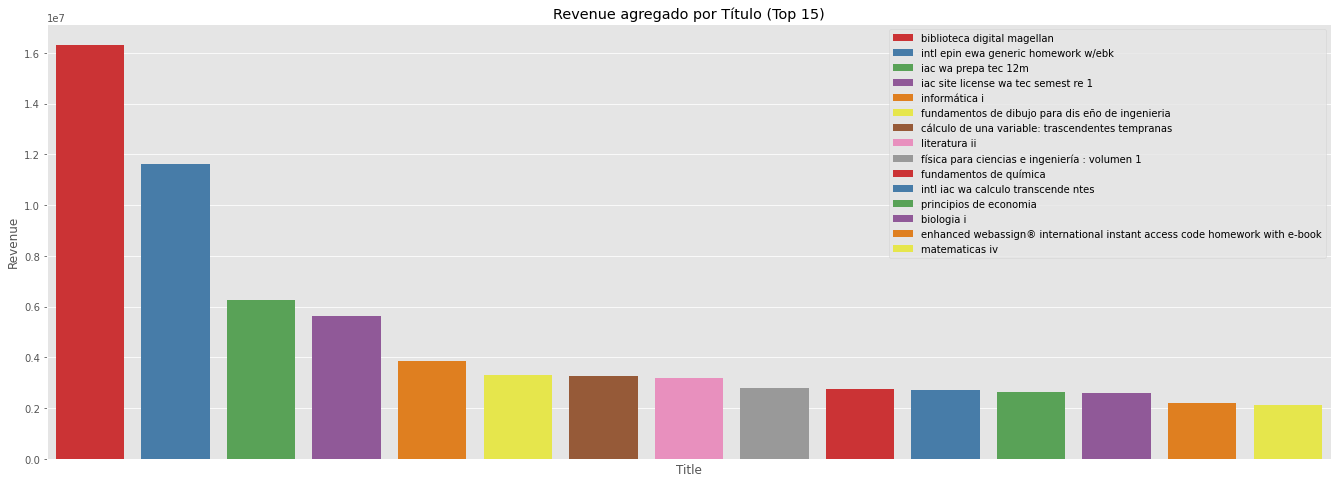

In [39]:
plt.figure(figsize=(23, 8))
agg_books_rev = df.groupby('Title').sum()['Revenue']
top_n_rev = agg_books_rev.sort_values(ascending=False)[:top].to_frame()
top_n_rev.reset_index(inplace=True)
ax = sns.barplot(x='Title', y='Revenue', data=top_n_rev,
                 hue='Title', dodge=False, palette='Set1')
ax.set_title(f'Revenue agregado por Título (Top {top})')
ax.set(xticks=[])
plt.legend(loc='upper right');


Observamos los 15 títulos más revenue que tiene la compañía siendo el número 1 el título "_Biblioteca digital magellan_". El socio formador nos comentó en las juntas que estos artículos eran de los más rentables para la compañía.

#### Libros con más unidades vendidas

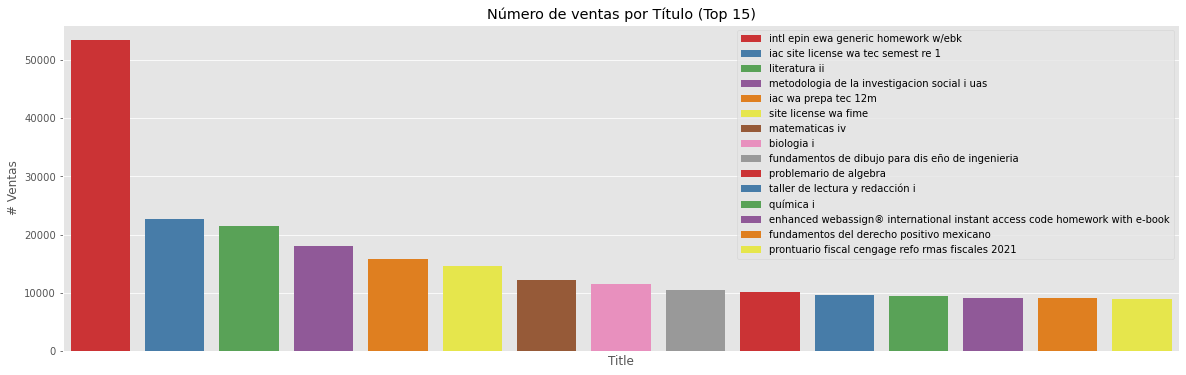

In [40]:
plt.figure(figsize=(20, 6))
agg_books_num_sales = df.groupby('Title').sum()['Units']
top_n_sales = agg_books_num_sales.sort_values(ascending=False)[:top].to_frame()
top_n_sales.reset_index(inplace=True)
ax = sns.barplot(x='Title', y='Units', data=top_n_sales,
                 hue='Title', dodge=False, palette='Set1')
ax.set_title(f'Número de ventas por Título (Top {top})')
ax.set_ylabel('# Ventas')
ax.set(xticks=[])
plt.legend(loc='upper right');


De aquí observamos que el título con mayor número de ventas es "_Intl epin ewa generic homework w/ebk_" con más de 50,000 unidades vendidas.

#### Universidades que mas compran

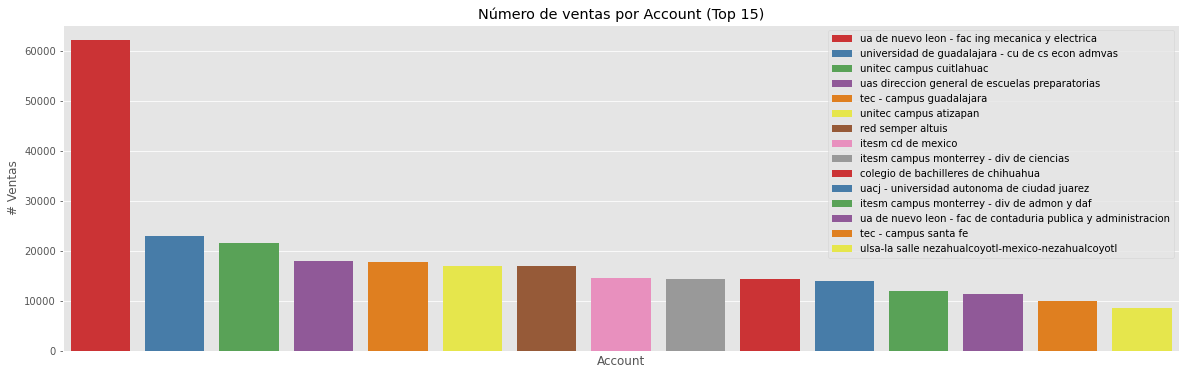

In [41]:
plt.figure(figsize=(20, 6))
agg_books_num_account = df.groupby('Account').sum()['Units']
top_n_account = agg_books_num_account.sort_values(ascending=False)[:top].to_frame()
top_n_account.reset_index(inplace=True)
ax = sns.barplot(x='Account', y='Units', hue='Account', data=top_n_account,
                dodge=False, palette='Set1')
ax.set_title(f'Número de ventas por Account (Top {top})')
ax.set_ylabel('# Ventas')
ax.set(xticks=[])
plt.legend(loc='upper right');


En esta gráfica podemos observar el top 15 de las instituciones que más compras de libros realizan, teniendo en #1 "_UA de Nuevo León - Fac Ing mecanica y electrica_" con la compra mayor a 60,000 unidades.

In [42]:
df.to_csv('cleaned_data.csv', index=False)